# **Project - Fake News Detection Using NLP Techniques**

 ***The code was intially done in different files and was executed line by line. Later streamlined the code into this file.Scroll the Output panels to see the visualizations of all the models with their embeddings - Vidushi***





In [ ]:
!nvidia-smi

Mon Dec  4 04:33:36 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    46W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
pip install transformers

In [ ]:
pip install gensim

In [ ]:
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import files

gensim                           4.3.2
keras                            2.14.0
matplotlib                       3.7.1
matplotlib-inline                0.1.6
nltk                             3.8.1
notebook                         6.5.5
numpy                            1.23.5
pandas                           1.5.3
scikit-learn                     1.2.2
seaborn                          0.12.2
tensorflow                       2.14.0




In [ ]:
pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
#from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, roc_curve, auc
import gensim
from gensim.models import Word2Vec, FastText, KeyedVectors, Doc2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Input, Dropout, TimeDistributed, GlobalMaxPooling1D, Concatenate
import matplotlib.pyplot as plt
import gensim.downloader as api
from sklearn.metrics import accuracy_score
import seaborn as sns
from tensorflow.keras.layers import Input, Concatenate
from keras.models import Model
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from transformers import AutoTokenizer, TFAutoModel
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import time

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1v65TKRP7fEu_vbIhjZaJMdLlH-xj3dXJ' # cleaned dataset
download = drive.CreateFile({'id': file_id})

# Download the file to a local disc
download.GetContentFile('file.csv')
data = pd.read_csv('file.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
HOME = '/content/drive/MyDrive/DeepLearning/Project/'


In [ ]:
# Load your cleaned CSV file with text and labels
#data = pd.read_csv("C:/Users/bhati/DeepLearning/Project/Data/CleanedData_n.csv")
print(data.head())
print(data.info())
print(data.isnull().sum())
data = data.dropna()
print(data.info())

                                                text  target
0  ankara reuters turkish sudanese intelligence a...       0
1  reuters supreme court friday refused stay ruli...       0
2  one presidential candidate king dog whistle po...       1
3  wonder want anyone see speech singing praise t...       1
4  feel bern lot gullible young people fed big li...       1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42998 entries, 0 to 42997
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    42998 non-null  object
 1   target  42998 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 672.0+ KB
None
text      0
target    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42998 entries, 0 to 42997
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    42998 non-null  object
 1   target  42998 non-null  int64 
dtypes: int64(1), object(1)
memory u

In [ ]:
# add number of characters column
data["num_chars"] = data["text"].apply(lambda x: len(x))

# add number of words column
data["num_words"] = data["text"].apply(lambda x: len(x.split(" ")))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42998 entries, 0 to 42997
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       42998 non-null  object
 1   target     42998 non-null  int64 
 2   num_chars  42998 non-null  int64 
 3   num_words  42998 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.3+ MB


In [ ]:
data['num_words'].describe()

count    42998.000000
mean       253.720173
std        244.172707
min          1.000000
25%        130.000000
50%        214.000000
75%        309.000000
max      10208.000000
Name: num_words, dtype: float64

In [ ]:
data['num_chars'].describe()

count    42998.000000
mean      1846.565840
std       1780.411388
min          4.000000
25%        934.000000
50%       1550.000000
75%       2242.000000
max      68986.000000
Name: num_chars, dtype: float64

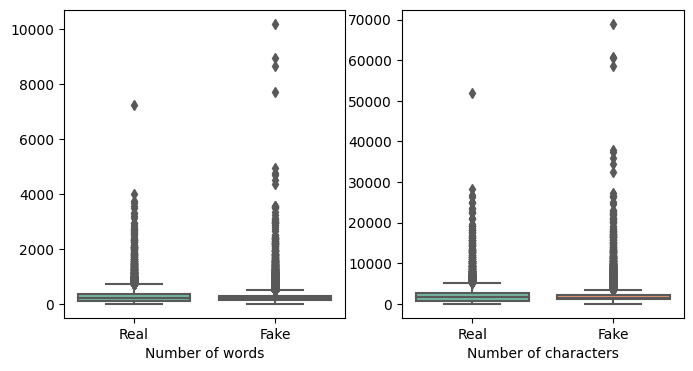

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 4))

label = ['Real', 'Fake']

sns.boxplot(y=data["num_words"], x=data['target'], ax=ax[0], palette="Set2")
sns.boxplot(y=data["num_chars"], x=data['target'], ax=ax[1], palette="Set2")

ax[0].set_xlabel("Number of words")
ax[1].set_xlabel("Number of characters")
ax[0].set_ylabel("")
ax[1].set_ylabel("")
ax[0].set_xticklabels(label)
ax[1].set_xticklabels(label)
plt.show()

In [ ]:
df_temp = data[(data['num_words'] >= 310)][['target']]
df_temp['target'].value_counts()

0    6807
1    3896
Name: target, dtype: int64

In [ ]:
df_temp = data[(data['num_words'] >= 310)][['text','num_words','target']]
df_temp

,text,num_words,target
11,official said russian warned launched least to...,335,1
16,washington reuters president donald trump cons...,467,0
17,brussels reuters pledging stay best friend eur...,408,0
18,news horrific enough deputy national security ...,421,1
20,istanbul baghdad reuters turkey parliament vot...,415,0
...,...,...,...
42970,people scale border wall break law get country...,362,1
42976,september separate report racist graffiti spra...,437,1
42991,havana reuters opponent cuban government putti...,357,0
42992,washington reuters republican lawmaker tuesday...,360,0


In [ ]:
data[(data['num_words'] >= 300)][['text','num_words','target']].sort_values(by='num_words',ascending=False).reset_index()[:20]

,index,text,num_words,target
0,25954,many people choosing leave united state perman...,10208,1
1,22409,reason california worst state america december...,8942,1
2,39748,mathematically impossible pay national debt mi...,8652,1
3,31029,reference debate started daniel blatman israel...,7730,1
4,24855,oppressively humid day south florida jeb bush ...,7259,0
5,8083,funny secret travel start believe bleed lyric ...,4964,1
6,41836,discovered another reason support nfl man anti...,4772,1
7,16450,shawn helton st century wirealthough many stil...,4700,1
8,2518,many article written george soros collectivist...,4515,1
9,9647,shawn helton st century wirethe cult film natu...,4382,1


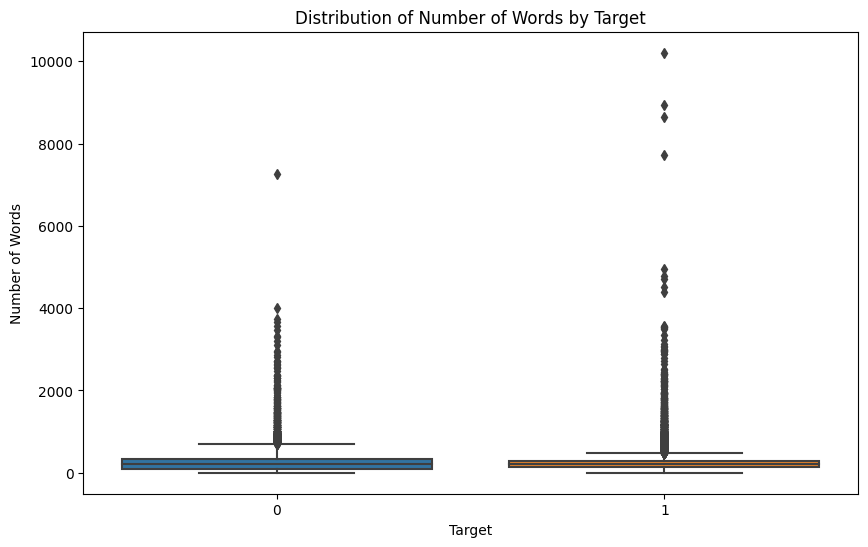

In [ ]:
# Assuming 'data' is your DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='num_words', data=data)
plt.title('Distribution of Number of Words by Target')
plt.xlabel('Target')
plt.ylabel('Number of Words')
plt.show()

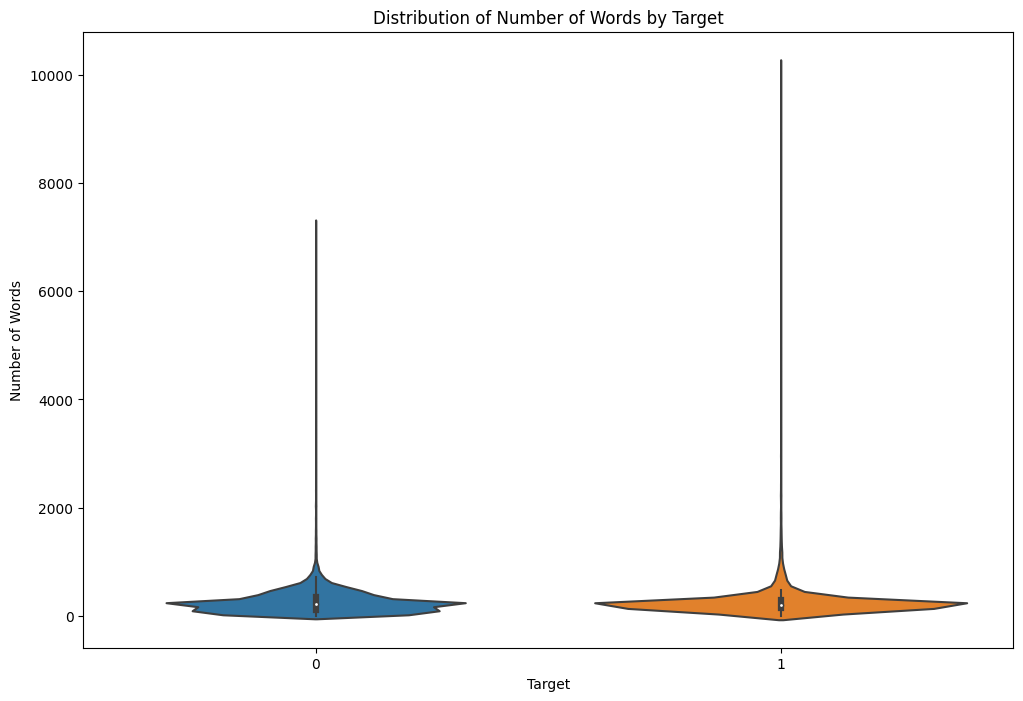

In [ ]:
# Assuming 'data' is your DataFrame
plt.figure(figsize=(12, 8))
sns.violinplot(x='target', y='num_words', data=data)
plt.title('Distribution of Number of Words by Target')
plt.xlabel('Target')
plt.ylabel('Number of Words')
plt.show()

Text(0, 0.5, 'Number of words')

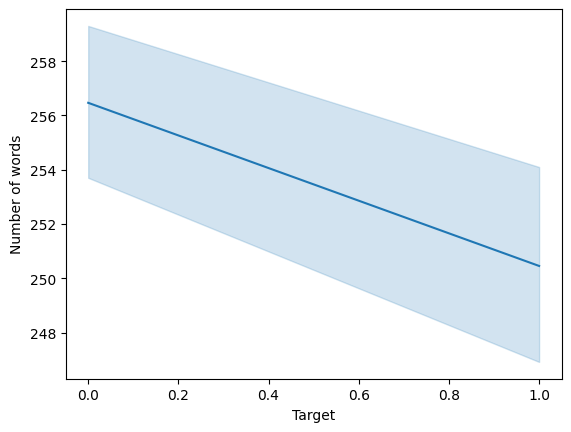

In [ ]:
ax = sns.lineplot( x = "target",
             y = "num_words",
             data = data);
ax.set_xlabel("Target")
ax.set_ylabel("Number of words")

Text(0, 0.5, 'Number of Characters')

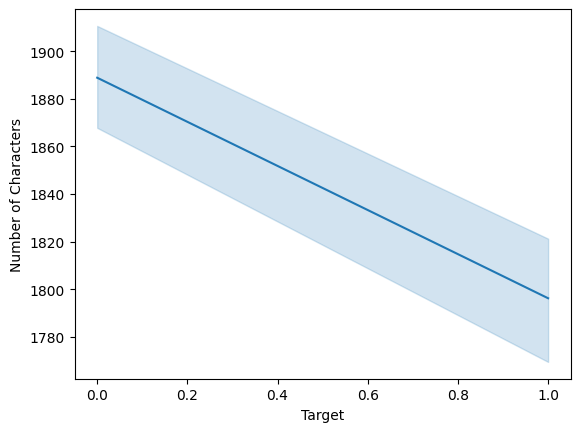

In [ ]:
ax = sns.lineplot( x = "target",
             y = "num_chars",
             data = data);
ax.set_xlabel("Target")
ax.set_ylabel("Number of Characters")

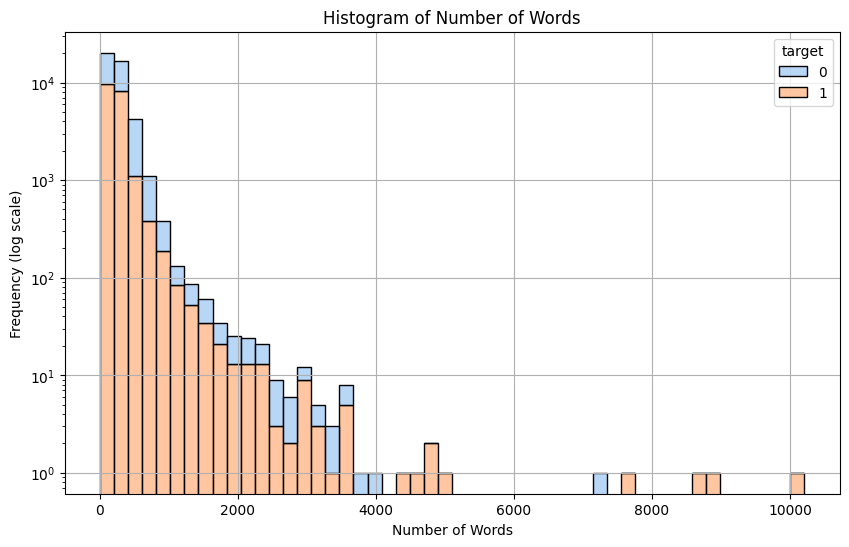

In [ ]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='num_words', bins=50, hue='target', multiple='stack', palette='pastel')
plt.title('Histogram of Number of Words')
plt.xlabel('Number of Words')
plt.ylabel('Frequency (log scale)')
plt.grid(True)
plt.yscale('log')  # Apply log scale to the y-axis
plt.show()

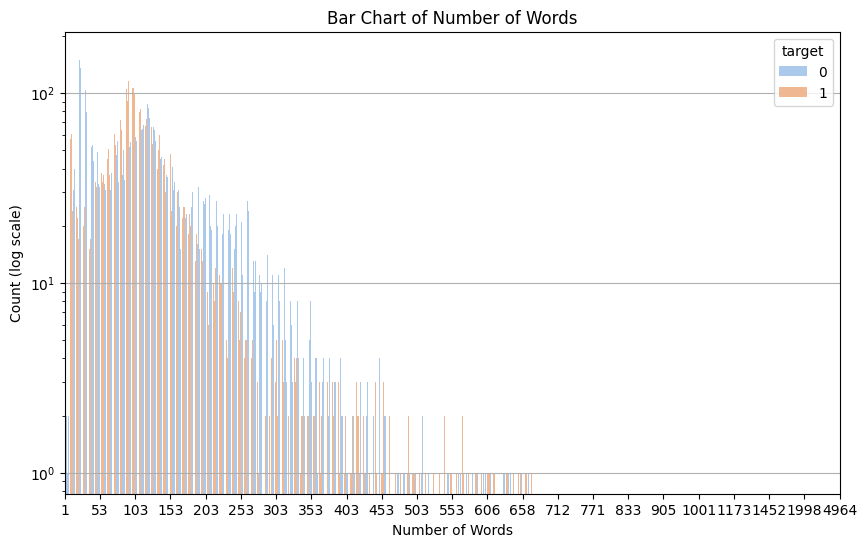

In [ ]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
df_grouped = data.groupby(['num_words', 'target']).size().reset_index(name='count')
sns.barplot(data=df_grouped, x='num_words', y='count', hue='target', palette='pastel')
plt.title('Bar Chart of Number of Words')
plt.xlabel('Number of Words')
plt.ylabel('Count (log scale)')
plt.grid(axis='y')
plt.yscale('log')  # Apply log scale to the y-axis
# Set x-axis labels to display every n-th label
n = 100  # Adjust this value based on your preference
plt.xticks(range(0, len(df_grouped['num_words']), n), df_grouped['num_words'][::n])

plt.show()

## The Fake News have either very high numbers of words or very low number of words. In general, as there is a decrease in the number of words(characters) in the news articles, the "Fakeness" of the News becomes high. This may be due to the fact, that many fake articles are just little information and links to some other fake sites and or fake news can be full of large fake stories to build a narrative in the minds of readers to evoke curiosity and chaos in their minds leading to gaining their attention more.

In [ ]:
def make_rocauc(model, X_test_padded, y_test):
    class_probabilities = model.predict(X_test_padded)
    preds = class_probabilities[:, 0]  # class 1 is the positive class

    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)

    # Printing AUC
    print(f"AUC for our classifier is: {round(roc_auc, 3)}")

    # Plotting the ROC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label=f'AUC = {roc_auc:.2f}')
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
def load_split_data():
    train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
    return train_data, test_data

In [ ]:
train_data, test_data= load_split_data()

In [ ]:
train_data.shape, test_data.shape

((34398, 4), (8600, 4))

In [ ]:
train_data.sort_values(['num_words'],ascending=False)

,text,target,num_chars,num_words
25954,many people choosing leave united state perman...,1,68986,10208
22409,reason california worst state america december...,1,60765,8942
39748,mathematically impossible pay national debt mi...,1,60642,8652
24855,oppressively humid day south florida jeb bush ...,0,51840,7259
8083,funny secret travel start believe bleed lyric ...,1,37424,4964
...,...,...,...,...
7113,brilliant,1,9,1
42628,outrageous,1,10,1
26055,watch,1,5,1
31467,ouch,1,4,1


In [ ]:
train_data['target'].value_counts()

0    18576
1    15822
Name: target, dtype: int64

In [ ]:
#DATA Augmentation.. Later

In [ ]:
# Text preprocessing
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['text'])


In [ ]:
train_data['text']

30167    new york reuters government took legal battle ...
21880    medium outlet pledge evenhanded criticism trum...
23217    moscow reuters russian president vladimir puti...
7183     san francisco reuters wikileaks document showi...
39193    point well known limit low donald trump sink f...
                               ...                        
6265     sochi russia reuters critical decision taken s...
11284    beijing reuters china defended ally pakistan t...
38158    sydney reuters australian prime minister malco...
860      sean spicer former communication man republica...
15795    barack obama planning use taxpayer money trave...
Name: text, Length: 34398, dtype: object

In [ ]:
train_data.head(2)

,text,target,num_chars,num_words
30167,new york reuters government took legal battle ...,0,2448,335
21880,medium outlet pledge evenhanded criticism trum...,1,1112,153


In [ ]:
test_data.head(2)

,text,target,num_chars,num_words
13579,whatever happens bernie message already damage...,0,2532,341
2969,london reuters british foreign secretary boris...,0,422,56


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_cols = ['num_words', 'num_chars']

# Fit and transform on the training data
train_data[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])

# Applying the same transformation to the test data
test_data[numerical_cols] = scaler.transform(test_data[numerical_cols])

In [ ]:
X_train = tokenizer.texts_to_sequences(train_data['text'])
X_test = tokenizer.texts_to_sequences(test_data['text'])

In [ ]:
# Determine the maximum sequence length
max_length = max(len(seq) for seq in X_train + X_test)
max_length

10208

In [ ]:
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

In [ ]:
X_train[0]

array([    0,     0,     0, ...,  2196, 28983,     2], dtype=int32)

In [ ]:
len(X_train[0])

10208

In [ ]:
len(X_test[0])

10208

## **X_train and X_test are now without the inclusion of number of words.**

To include number of words at the end of the sequence, we need to append this feature at the end of each padded sequence. Therefore, length of each row of 10208 will then convert to 10209. I will evaluate whether including the number of characters will have any effect on the model's performance.

In [ ]:
# Use 'num_words' from train_data
num_words_feature_train = train_data['num_words']
num_words_feature_train

30167    0.332175
21880   -0.409240
23217   -0.177039
7183     0.816947
39193   -0.221850
           ...   
6265    -0.853275
11284   -0.234071
38158   -0.604778
860      0.515492
15795    0.328101
Name: num_words, Length: 34398, dtype: float64

In [ ]:
# Use 'num_words' from test_data
num_words_feature_test = test_data['num_words']
num_words_feature_test

13579     0.356617
2969     -0.804390
20775     0.568450
16536     1.513551
12710     0.071458
           ...    
2518     17.360284
9354     -0.454051
40869     1.281349
14606     1.448372
8966     -0.474420
Name: num_words, Length: 8600, dtype: float64

In [ ]:
num_words_feature_train = np.array(num_words_feature_train).reshape(-1, 1)
num_words_feature_train


array([[ 0.33217497],
       [-0.40924032],
       [-0.17703883],
       ...,
       [-0.60477842],
       [ 0.51549194],
       [ 0.32810126]])

In [ ]:
num_words_feature_test = np.array(num_words_feature_test).reshape(-1, 1)
num_words_feature_test

array([[ 0.35661724],
       [-0.80439023],
       [ 0.56845018],
       ...,
       [ 1.2813495 ],
       [ 1.44837162],
       [-0.47441969]])

In [ ]:
# Concatenate the number of words feature with the padded sequences
X_train_numofwords = np.concatenate([X_train, num_words_feature_train], axis=1)

X_test_numofwords = np.concatenate([X_test, num_words_feature_test], axis=1)

In [ ]:
X_train_numofwords[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       2.89830000e+04, 2.00000000e+00, 3.32174974e-01])

In [ ]:
X_test_numofwords[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       3.94000000e+02, 9.03000000e+02, 3.56617237e-01])

In [ ]:
X_train_numofwords.shape, X_test_numofwords.shape

((34398, 10209), (8600, 10209))

## **The above X_train_numofwords, X_test_numofwords are with the inclusion of words.**

# **Model used is Bi-LSTM**
## ***Embeddings used are:***
- Word2Vec,
- Fasttext,
- Glove,
- Doc2Vec,
- BERT


#### **Doc2Vec Model Trained using the dataset. Uncomment the below section to train the model again.**

In [ ]:
# Tokenizing the text data for Doc2Vec Model
# tagged_data = [TaggedDocument(words=doc.split(), tags=[str(i)]) for i, doc in enumerate(data['text'])]

# # Train Doc2Vec model
# doc2vec_model = Doc2Vec(vector_size=100, window=2, min_count=1, workers=4, epochs=10)
# doc2vec_model.build_vocab(tagged_data)
# doc2vec_model.train(tagged_data, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

# doc2vec_model.save("/content/drive/MyDrive/DeepLearning/Project/data/doc2vec_model")

In [ ]:
doc2vec_model = Doc2Vec.load("/content/drive/MyDrive/DeepLearning/HW/HW4/doc2vec_model")

In [ ]:
# Load models
word2vec_model = api.load("word2vec-google-news-300")
fasttext_model = FastText.load_fasttext_format("/content/drive/MyDrive/DeepLearning/Project/data/wiki.en.bin")
glove_model = KeyedVectors.load_word2vec_format("/content/drive/MyDrive/DeepLearning/Project/data/glove.6B.300d.txt", binary=False, no_header=True)
doc2vec_model = Doc2Vec.load("/content/drive/MyDrive/DeepLearning/HW/HW4/doc2vec_model")

<ipython-input-51-a677992f3ac9>:3: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  fasttext_model = FastText.load_fasttext_format("/content/drive/MyDrive/DeepLearning/Project/data/wiki.en.bin")


In [ ]:
results =[]

In [ ]:
# Define your class labels
class_labels = ['Class 0', 'Class 1']

In [ ]:
# Word Embeddings
embeddings = {
    'Word2Vec': word2vec_model,
    'FastText': fasttext_model,
    'GloVe': glove_model
    }

In [ ]:
# Sequential Models
models = {
    'LSTM': LSTM,
    'Bi-LSTM': lambda units, **kwargs: Bidirectional(LSTM(units, **kwargs)),
}

In [ ]:
def load_pretrained_embedding_matrix(embedding_model, word_index, max_words, embedding_dim):
    # Initialize the embedding matrix with zeros
    embedding_matrix = np.zeros((max_words, embedding_dim))

    # Iterate over the words in the tokenizer's word index
    for word, i in word_index.items():
        if i < max_words:
            try:
                # Get the embedding vector for the word from the pre-trained model
                if isinstance(embedding_model, dict):
                    embedding_vector = embedding_model.get(word) # For GloVe
                else:
                    #, FastText, Doc2Vec, Word2Vec
                    embedding_vector = embedding_model[word]

                if embedding_vector is not None:
                    embedding_matrix[i] = embedding_vector
            except KeyError:
                # Handle the case where the word is not in the pre-trained model vocabulary
                pass

    return embedding_matrix

In [ ]:
# Define the model checkpoint callback
checkpoint_filepath = '/content/drive/MyDrive/DeepLearning/Project/best_wordfastglove.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_accuracy',  # Choose the metric to monitor for saving the best model
    mode='max',  # Use 'max' if the metric should be maximized, 'min' if minimized
    verbose=1
)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# **Word2Vec, Fasttext, Glove without adding number of words**

embedding_name, embedding_model =  Word2Vec KeyedVectors<vector_size=300, 3000000 keys>
model_name, model_type =  LSTM <class 'keras.src.layers.rnn.lstm.LSTM'>
embedding matrix of embedding Word2Vec :  [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.07910156  0.12158203 -0.00842285 ... -0.39257812  0.07763672
   0.27148438]
 [-0.00909424 -0.04418945  0.09960938 ...  0.14453125  0.18066406
  -0.08691406]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10208, 300)        29484300  
                                                                 
 lstm (LSTM)                 (None, 64)               

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy improved from 0.94113 to 0.95858, saving model to /content/drive/MyDrive/DeepLearning/Project/best_wordfastglove.h5

Epoch 3: val_accuracy did not improve from 0.95858

Epoch 4: val_accuracy did not improve from 0.95858

Epoch 5: val_accuracy improved from 0.95858 to 0.96294, saving model to /content/drive/MyDrive/DeepLearning/Project/best_wordfastglove.h5

Epoch 6: val_accuracy improved from 0.96294 to 0.97384, saving model to /content/drive/MyDrive/DeepLearning/Project/best_wordfastglove.h5

Epoch 7: val_accuracy improved from 0.97384 to 0.98183, saving model to /content/drive/MyDrive/DeepLearning/Project/best_wordfastglove.h5

Epoch 8: val_accuracy did not improve from 0.98183

Epoch 9: val_accuracy did not improve from 0.98183

Epoch 10: val_accuracy did not improve from 0.98183
model_name LSTM with Word2Vec has accuracy of 0.9813953638076782
269/269 [==============================] - 31s 113ms/step
Classification Report for LSTM with Word2Vec:
              

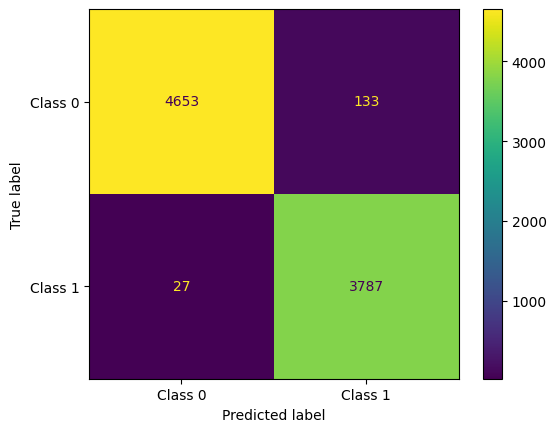

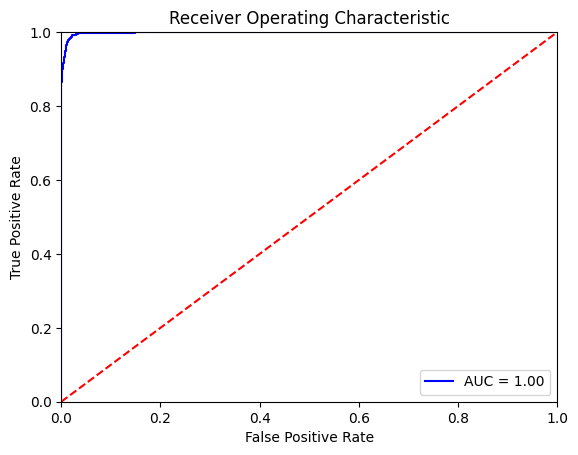

model_name, model_type =  Bi-LSTM <function <lambda> at 0x7a6be619e680>
embedding matrix of embedding Word2Vec :  [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.07910156  0.12158203 -0.00842285 ... -0.39257812  0.07763672
   0.27148438]
 [-0.00909424 -0.04418945  0.09960938 ...  0.14453125  0.18066406
  -0.08691406]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10208, 300)        29484300  
                                                                 
 bidirectional (Bidirection  (None, 128)               186880    
 al)                                                             
        

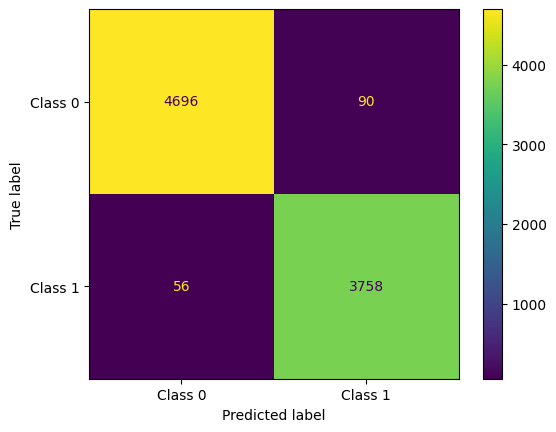

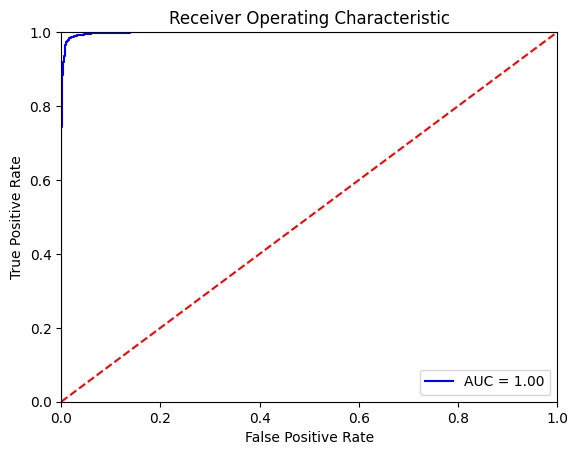

embedding_name, embedding_model =  FastText FastText<vocab=2519370, vector_size=300, alpha=0.025>
model_name, model_type =  LSTM <class 'keras.src.layers.rnn.lstm.LSTM'>
embedding matrix of embedding FastText :  [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.24036215 -0.22908141 -0.31712487 ...  0.28751108 -0.0689316
   0.04915212]
 [-0.14996129 -0.18912345 -0.31939328 ...  0.00385566  0.13015246
  -0.04950039]
 ...
 [ 0.01499472  0.07942831 -0.1759029  ... -0.03000036  0.1012929
   0.30486816]
 [ 0.43211842 -0.69099122  0.0371074  ...  0.38718542  0.00426797
  -0.41213489]
 [-0.50899577 -0.39953855 -0.13307911 ... -0.16635975  0.18100037
   0.1541521 ]]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10208, 300)        29484300  
                                                                 
 lstm_2 (LSTM)      

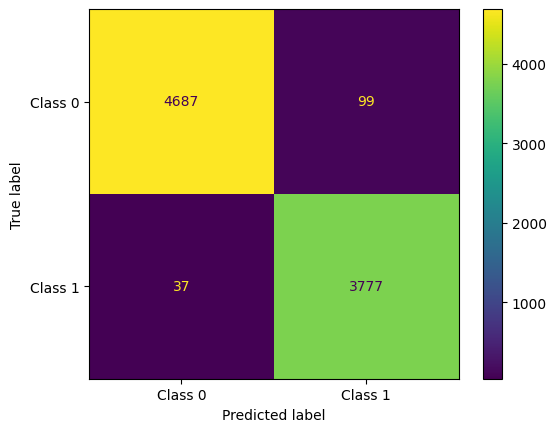

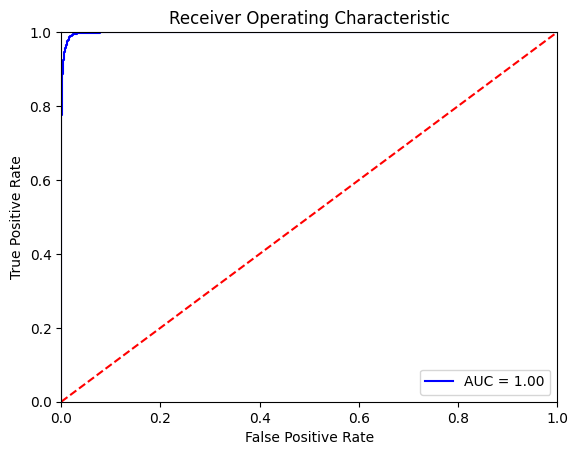

model_name, model_type =  Bi-LSTM <function <lambda> at 0x7a6be619e680>
embedding matrix of embedding FastText :  [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.24036215 -0.22908141 -0.31712487 ...  0.28751108 -0.0689316
   0.04915212]
 [-0.14996129 -0.18912345 -0.31939328 ...  0.00385566  0.13015246
  -0.04950039]
 ...
 [ 0.01499472  0.07942831 -0.1759029  ... -0.03000036  0.1012929
   0.30486816]
 [ 0.43211842 -0.69099122  0.0371074  ...  0.38718542  0.00426797
  -0.41213489]
 [-0.50899577 -0.39953855 -0.13307911 ... -0.16635975  0.18100037
   0.1541521 ]]
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 10208, 300)        29484300  
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               186880    
 onal)                                              

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 8: val_accuracy improved from 0.98430 to 0.98663, saving model to /content/drive/MyDrive/DeepLearning/Project/best_wordfastglove.h5

Epoch 9: val_accuracy did not improve from 0.98663

Epoch 10: val_accuracy did not improve from 0.98663
model_name Bi-LSTM with FastText has accuracy of 0.9865116477012634
269/269 [==============================] - 60s 222ms/step
Classification Report for Bi-LSTM with FastText:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4786
           1       0.99      0.98      0.98      3814

    accuracy                           0.99      8600
   macro avg       0.99      0.99      0.99      8600
weighted avg       0.99      0.99      0.99      8600

Confusion Matrix for Bi-LSTM with FastText:
[[4747   39]
 [  77 3737]]
269/269 [==============================] - 60s 222ms/step
AUC for our classifier is: 0.999


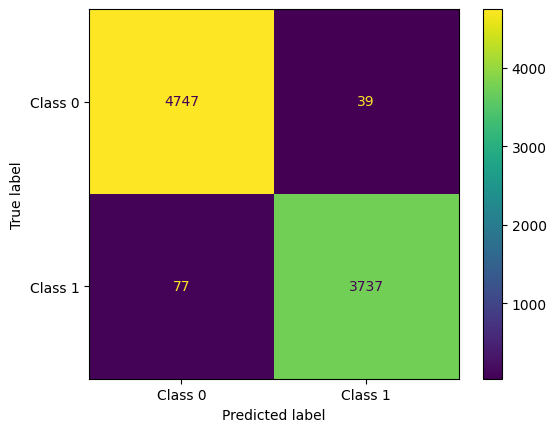

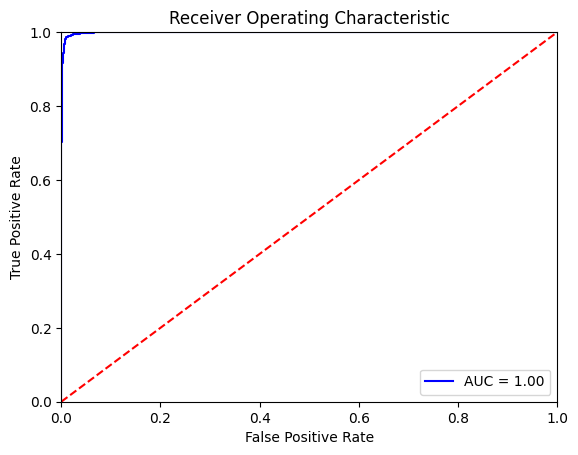

embedding_name, embedding_model =  GloVe KeyedVectors<vector_size=300, 400000 keys>
model_name, model_type =  LSTM <class 'keras.src.layers.rnn.lstm.LSTM'>
embedding matrix of embedding GloVe :  [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.049177    0.056631    0.36761999 ... -0.41918999  0.37843001
   0.41108   ]
 [-0.24135     0.15132     0.016839   ...  0.44316    -0.93458998
   0.40801999]
 ...
 [ 0.53665    -0.27088001 -0.52245998 ...  0.35896999  0.34038001
   0.057998  ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 10208, 300)        29484300  
                                                                 
 lstm_4 (LSTM)               (None, 64)            

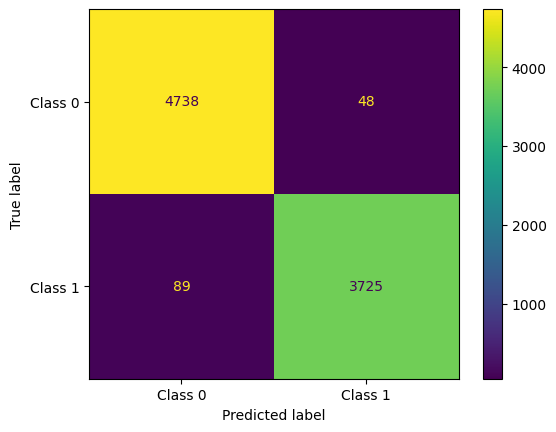

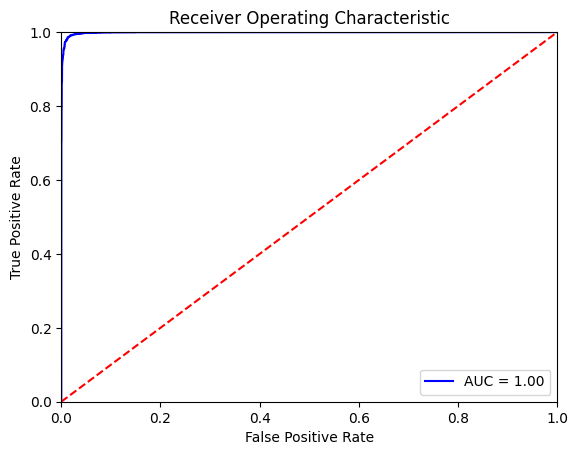

model_name, model_type =  Bi-LSTM <function <lambda> at 0x7a6be619e680>
embedding matrix of embedding GloVe :  [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.049177    0.056631    0.36761999 ... -0.41918999  0.37843001
   0.41108   ]
 [-0.24135     0.15132     0.016839   ...  0.44316    -0.93458998
   0.40801999]
 ...
 [ 0.53665    -0.27088001 -0.52245998 ...  0.35896999  0.34038001
   0.057998  ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 10208, 300)        29484300  
                                                                 
 bidirectional_2 (Bidirecti  (None, 128)               186880    
 onal)                                                           
   

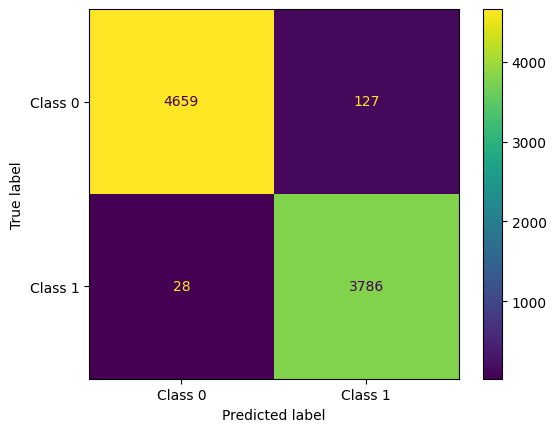

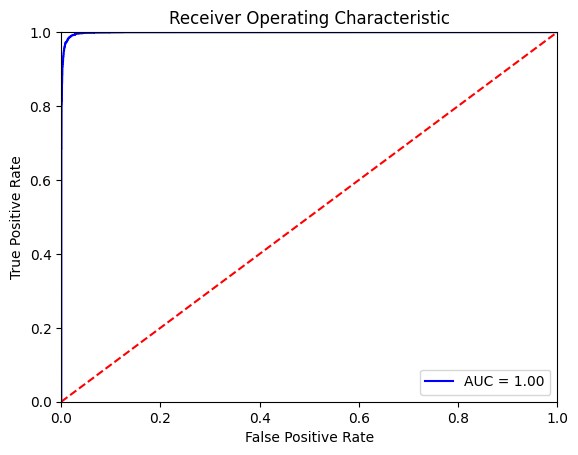

Total Time by Word2Vec,FastText, Glove models: 374.713 minutes


In [ ]:
# Record the start time
start_time = time.time()

for embedding_name, embedding_model in embeddings.items():
    print('embedding_name, embedding_model = ', embedding_name, embedding_model)
    for model_name, model_type in models.items():
        print('model_name, model_type = ', model_name, model_type)

        if embedding_name == 'Word2Vec' :

          # Check if embedding_model is a Word2Vec model
          if isinstance(embedding_model, Word2Vec):
              embedding_matrix_word2vec = load_pretrained_embedding_matrix(embedding_model, tokenizer.word_index, len(tokenizer.word_index) + 1, embedding_model.vector_size)
          else:
              embedding_matrix_word2vec = load_pretrained_embedding_matrix(embedding_model, tokenizer.word_index, len(tokenizer.word_index) + 1, len(embedding_model['the']))
          embedding_matrix = embedding_matrix_word2vec
          print(f'embedding matrix of embedding {embedding_name} : ', embedding_matrix)
          embedding_layer = Embedding(
          input_dim=len(tokenizer.word_index) + 1,
          output_dim=embedding_matrix.shape[1],
          input_length=max_length,
          trainable=False,
          weights=[embedding_matrix],
          )

        elif embedding_name == 'FastText' :
          embedding_matrix_fasttext = load_pretrained_embedding_matrix(fasttext_model.wv, tokenizer.word_index, len(tokenizer.word_index) + 1, fasttext_model.vector_size)
          embedding_matrix = embedding_matrix_fasttext
          print(f'embedding matrix of embedding {embedding_name} : ', embedding_matrix)
          embedding_layer = Embedding(
          input_dim=len(tokenizer.word_index) + 1,
          output_dim=embedding_matrix.shape[1],
          input_length=max_length,
          trainable=False,
          weights=[embedding_matrix],
          )

        elif embedding_name == 'GloVe':
          embedding_matrix_glove = load_pretrained_embedding_matrix(glove_model, tokenizer.word_index, len(tokenizer.word_index) + 1, len(glove_model['the']))
          embedding_matrix = embedding_matrix_glove
          print(f'embedding matrix of embedding {embedding_name} : ', embedding_matrix)
          embedding_layer = Embedding(
          input_dim=len(tokenizer.word_index) + 1,
          output_dim=embedding_matrix.shape[1],
          input_length=max_length,
          trainable=False,
          weights=[embedding_matrix],
          )

        model = Sequential()
        model.add(embedding_layer)
        model.add(model_type(64))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

        model.summary()

        # Train the model
        model.fit(X_train, train_data['target'], epochs=10, batch_size=32, validation_split=0.2, verbose=0, callbacks=[model_checkpoint_callback,early_stop])

        # Evaluate the model
        _, accuracy = model.evaluate(X_test, test_data['target'], verbose=0)

        print(f"model_name {model_name} with {embedding_name} has accuracy of {accuracy}")
        #results.append({'Embedding': embedding_name, 'Model': model_name, 'Accuracy': accuracy * 100})
        results.append({'Embedding': f'{embedding_name}_without_num', 'Model': model_name, 'Accuracy': accuracy * 100})


        # Evaluate the model
        y_pred = model.predict(X_test)

        # Convert probabilities to class labels
        y_pred_labels = (y_pred > 0.5).astype(int)

        # Print classification report and confusion matrix
        print(f"Classification Report for {model_name} with {embedding_name}:")
        print(classification_report(test_data['target'], y_pred_labels))

        print(f"Confusion Matrix for {model_name} with {embedding_name}:")
        cm = confusion_matrix(test_data['target'], y_pred_labels)
        print(cm)

        # Display the confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
        disp.plot()

        plt.figure()
        make_rocauc(model,X_test,test_data['target'])

# # Record the end time
end_time = time.time()

model_time = round((time.time()-start_time)/60, 3)
print(f'Total Time by Word2Vec,FastText, Glove models: {model_time} minutes')



In [ ]:
results_df = pd.DataFrame(results)

#results_df

In [ ]:
# Save the DataFrame to a CSV file
results_df.to_csv('/content/drive/MyDrive/DeepLearning/Project/results_file.csv', index=False)

# Display the DataFrame
results_df

,Embedding,Model,Accuracy
0,Word2Vec_without_num,LSTM,98.139536
1,Word2Vec_without_num,Bi-LSTM,98.302323
2,FastText_without_num,LSTM,98.418605
3,FastText_without_num,Bi-LSTM,98.651165
4,GloVe_without_num,LSTM,98.406976
5,GloVe_without_num,Bi-LSTM,98.197675


# **Results With addition of Num Of Words**

In [ ]:
# Define the model checkpoint callback
checkpoint_filepath = '/content/drive/MyDrive/DeepLearning/Project/best_wordfastglove_num.h5'
withoutnum_model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_accuracy',  # Choose the metric to monitor for saving the best model
    mode='max',  # Use 'max' if the metric should be maximized, 'min' if minimized
    verbose=1
)

withoutnum_reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
withoutnum_early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
results = []

embedding_name, embedding_model =  Word2Vec KeyedVectors<vector_size=300, 3000000 keys>
model_name, model_type =  LSTM <class 'keras.src.layers.rnn.lstm.LSTM'>
embedding matrix of embedding Word2Vec :  [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.07910156  0.12158203 -0.00842285 ... -0.39257812  0.07763672
   0.27148438]
 [-0.00909424 -0.04418945  0.09960938 ...  0.14453125  0.18066406
  -0.08691406]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 10209, 300)        29484300  
                                                                 
 lstm_6 (LSTM)               (None, 64)             

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy improved from 0.93110 to 0.93125, saving model to /content/drive/MyDrive/DeepLearning/Project/best_wordfastglove_num.h5

Epoch 3: val_accuracy improved from 0.93125 to 0.94448, saving model to /content/drive/MyDrive/DeepLearning/Project/best_wordfastglove_num.h5

Epoch 4: val_accuracy improved from 0.94448 to 0.96541, saving model to /content/drive/MyDrive/DeepLearning/Project/best_wordfastglove_num.h5

Epoch 5: val_accuracy improved from 0.96541 to 0.97500, saving model to /content/drive/MyDrive/DeepLearning/Project/best_wordfastglove_num.h5

Epoch 6: val_accuracy improved from 0.97500 to 0.97776, saving model to /content/drive/MyDrive/DeepLearning/Project/best_wordfastglove_num.h5

Epoch 7: val_accuracy improved from 0.97776 to 0.97863, saving model to /content/drive/MyDrive/DeepLearning/Project/best_wordfastglove_num.h5

Epoch 8: val_accuracy did not improve from 0.97863

Epoch 9: val_accuracy improved from 0.97863 to 0.97907, saving model to /content/drive/My

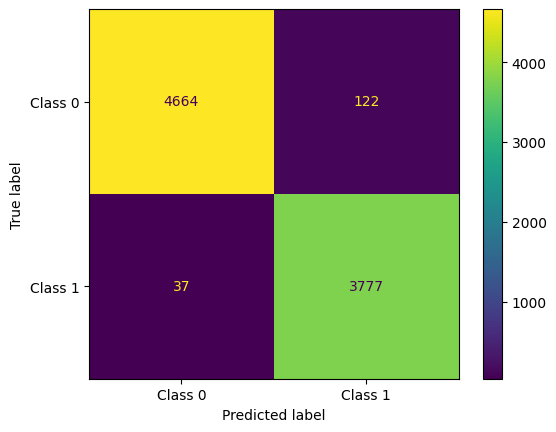

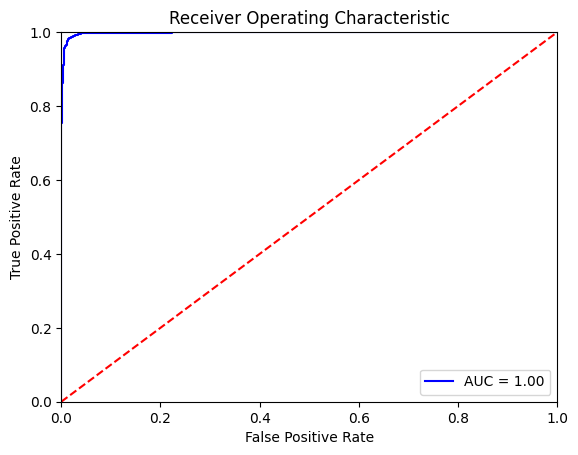

model_name, model_type =  Bi-LSTM <function <lambda> at 0x7a6be619e680>
embedding matrix of embedding Word2Vec :  [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.07910156  0.12158203 -0.00842285 ... -0.39257812  0.07763672
   0.27148438]
 [-0.00909424 -0.04418945  0.09960938 ...  0.14453125  0.18066406
  -0.08691406]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 10209, 300)        29484300  
                                                                 
 bidirectional_3 (Bidirecti  (None, 128)               186880    
 onal)                                                           
        

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 8: val_accuracy did not improve from 0.98009

Epoch 9: val_accuracy improved from 0.98009 to 0.98096, saving model to /content/drive/MyDrive/DeepLearning/Project/best_wordfastglove_num.h5

Epoch 10: val_accuracy improved from 0.98096 to 0.98328, saving model to /content/drive/MyDrive/DeepLearning/Project/best_wordfastglove_num.h5
model_name Bi-LSTM with Word2Vec has accuracy of 0.984186053276062
269/269 [==============================] - 61s 224ms/step
Classification Report for Bi-LSTM with Word2Vec:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4786
           1       0.98      0.99      0.98      3814

    accuracy                           0.98      8600
   macro avg       0.98      0.98      0.98      8600
weighted avg       0.98      0.98      0.98      8600

Confusion Matrix for Bi-LSTM with Word2Vec:
[[4702   84]
 [  52 3762]]
269/269 [==============================] - 60s 224ms/step
AUC for our classifier is: 0.99

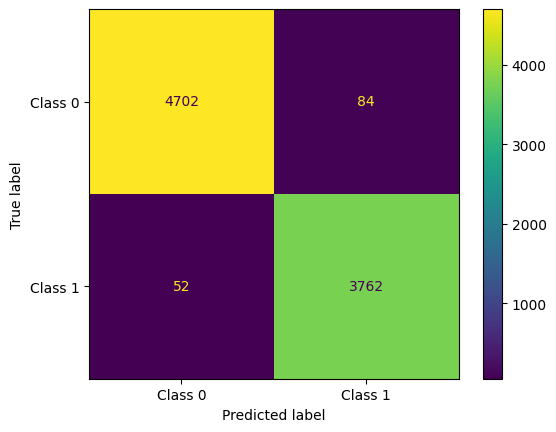

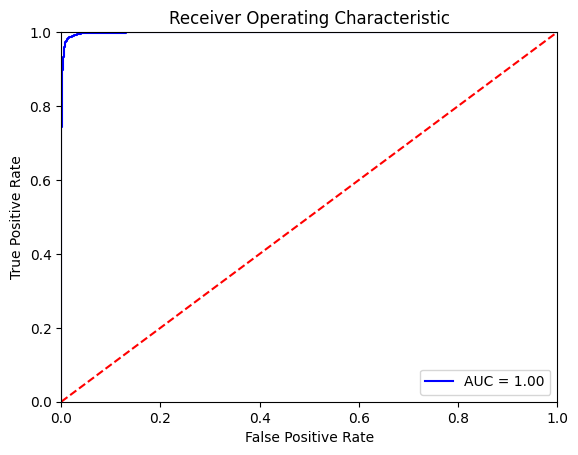

embedding_name, embedding_model =  FastText FastText<vocab=2519370, vector_size=300, alpha=0.025>
model_name, model_type =  LSTM <class 'keras.src.layers.rnn.lstm.LSTM'>
embedding matrix of embedding FastText :  [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.24036215 -0.22908141 -0.31712487 ...  0.28751108 -0.0689316
   0.04915212]
 [-0.14996129 -0.18912345 -0.31939328 ...  0.00385566  0.13015246
  -0.04950039]
 ...
 [ 0.01499472  0.07942831 -0.1759029  ... -0.03000036  0.1012929
   0.30486816]
 [ 0.43211842 -0.69099122  0.0371074  ...  0.38718542  0.00426797
  -0.41213489]
 [-0.50899577 -0.39953855 -0.13307911 ... -0.16635975  0.18100037
   0.1541521 ]]
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 10209, 300)        29484300  
                                                                 
 lstm_8 (LSTM)      

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 8: val_accuracy did not improve from 0.98401

Epoch 9: val_accuracy did not improve from 0.98401

Epoch 10: val_accuracy improved from 0.98401 to 0.98488, saving model to /content/drive/MyDrive/DeepLearning/Project/best_wordfastglove_num.h5
model_name LSTM with FastText has accuracy of 0.9837209582328796
269/269 [==============================] - 31s 115ms/step
Classification Report for LSTM with FastText:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4786
           1       0.99      0.97      0.98      3814

    accuracy                           0.98      8600
   macro avg       0.98      0.98      0.98      8600
weighted avg       0.98      0.98      0.98      8600

Confusion Matrix for LSTM with FastText:
[[4745   41]
 [  99 3715]]
269/269 [==============================] - 31s 114ms/step
AUC for our classifier is: 0.999


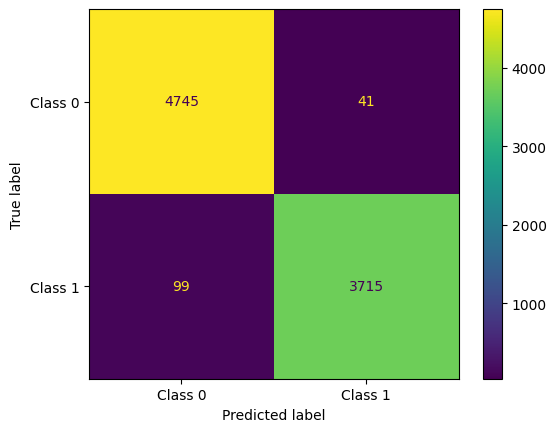

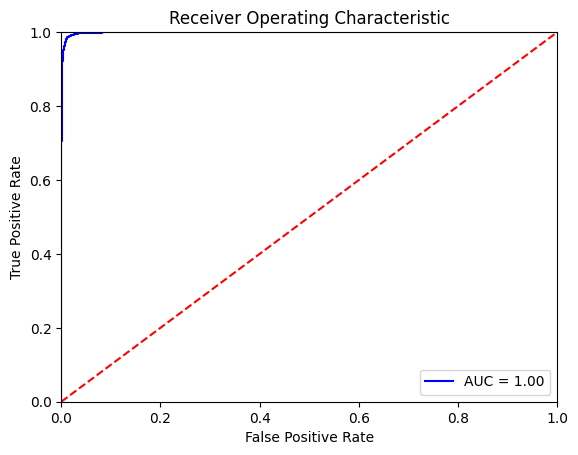

model_name, model_type =  Bi-LSTM <function <lambda> at 0x7a6be619e680>
embedding matrix of embedding FastText :  [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.24036215 -0.22908141 -0.31712487 ...  0.28751108 -0.0689316
   0.04915212]
 [-0.14996129 -0.18912345 -0.31939328 ...  0.00385566  0.13015246
  -0.04950039]
 ...
 [ 0.01499472  0.07942831 -0.1759029  ... -0.03000036  0.1012929
   0.30486816]
 [ 0.43211842 -0.69099122  0.0371074  ...  0.38718542  0.00426797
  -0.41213489]
 [-0.50899577 -0.39953855 -0.13307911 ... -0.16635975  0.18100037
   0.1541521 ]]
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 10209, 300)        29484300  
                                                                 
 bidirectional_4 (Bidirecti  (None, 128)               186880    
 onal)                                              

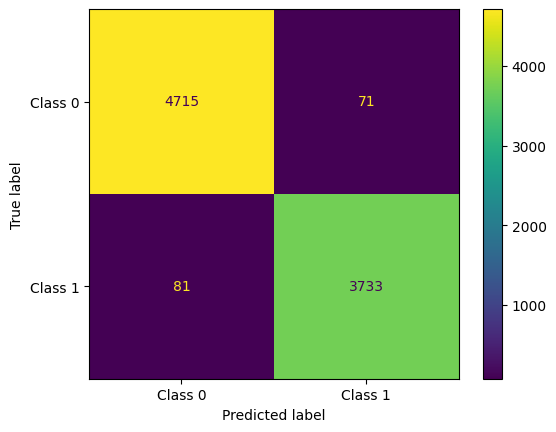

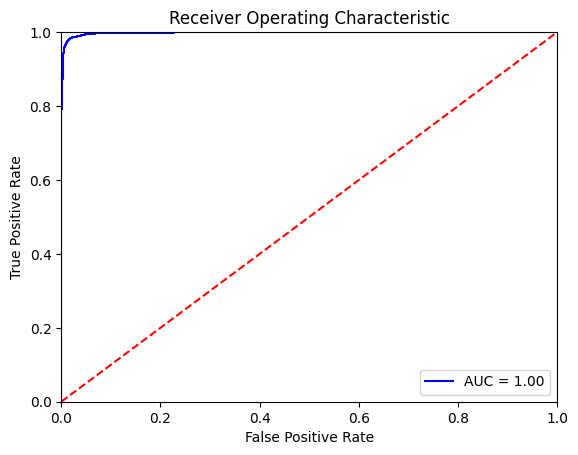

embedding_name, embedding_model =  GloVe KeyedVectors<vector_size=300, 400000 keys>
model_name, model_type =  LSTM <class 'keras.src.layers.rnn.lstm.LSTM'>
embedding matrix of embedding GloVe :  [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.049177    0.056631    0.36761999 ... -0.41918999  0.37843001
   0.41108   ]
 [-0.24135     0.15132     0.016839   ...  0.44316    -0.93458998
   0.40801999]
 ...
 [ 0.53665    -0.27088001 -0.52245998 ...  0.35896999  0.34038001
   0.057998  ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 10209, 300)        29484300  
                                                                 
 lstm_10 (LSTM)              (None, 64)           

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 8: val_accuracy did not improve from 0.98517

Epoch 9: val_accuracy did not improve from 0.98517

Epoch 10: val_accuracy did not improve from 0.98517
model_name LSTM with GloVe has accuracy of 0.9854651093482971
269/269 [==============================] - 31s 114ms/step
Classification Report for LSTM with GloVe:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4786
           1       0.98      0.99      0.98      3814

    accuracy                           0.99      8600
   macro avg       0.99      0.99      0.99      8600
weighted avg       0.99      0.99      0.99      8600

Confusion Matrix for LSTM with GloVe:
[[4716   70]
 [  55 3759]]
269/269 [==============================] - 31s 114ms/step
AUC for our classifier is: 0.999


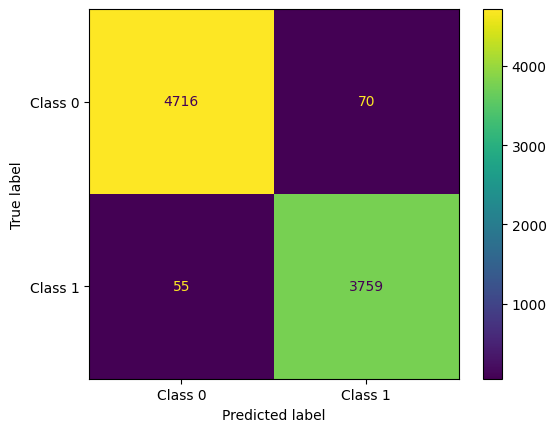

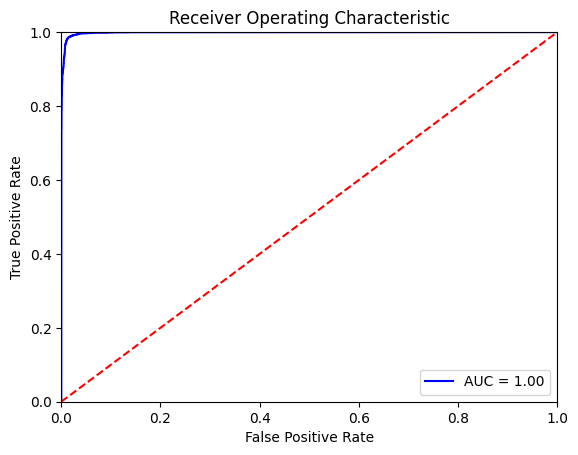

model_name, model_type =  Bi-LSTM <function <lambda> at 0x7a6be619e680>
embedding matrix of embedding GloVe :  [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.049177    0.056631    0.36761999 ... -0.41918999  0.37843001
   0.41108   ]
 [-0.24135     0.15132     0.016839   ...  0.44316    -0.93458998
   0.40801999]
 ...
 [ 0.53665    -0.27088001 -0.52245998 ...  0.35896999  0.34038001
   0.057998  ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 10209, 300)        29484300  
                                                                 
 bidirectional_5 (Bidirecti  (None, 128)               186880    
 onal)                                                           
  

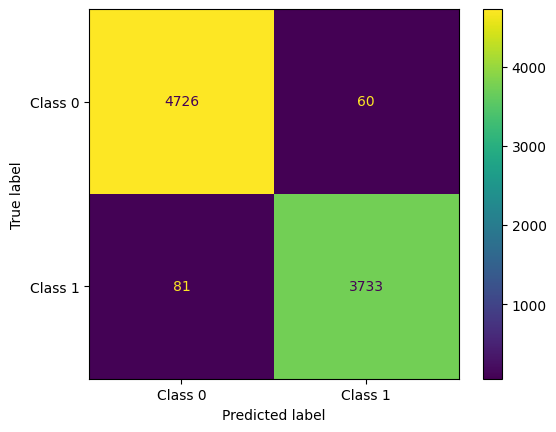

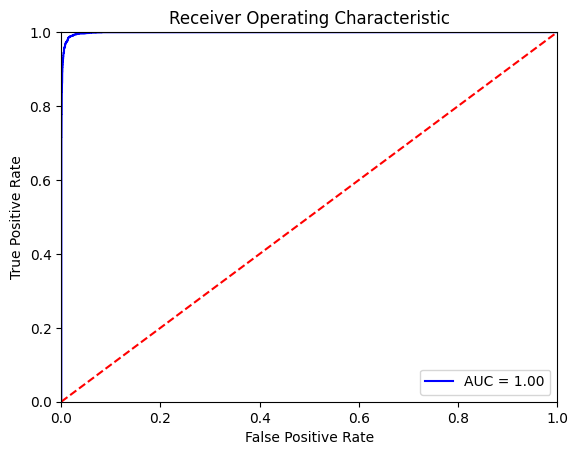

Total Time by Word2Vec,FastText, Glove with num_words: 377.073 minutes


In [ ]:
# Record the start time
start_time = time.time()

for embedding_name, embedding_model in embeddings.items():
    print('embedding_name, embedding_model = ', embedding_name, embedding_model)
    for model_name, model_type in models.items():
        print('model_name, model_type = ', model_name, model_type)

        if embedding_name == 'Word2Vec' :

          # Check if embedding_model is a Word2Vec model
          if isinstance(embedding_model, Word2Vec):
              embedding_matrix_word2vec = load_pretrained_embedding_matrix(embedding_model, tokenizer.word_index, len(tokenizer.word_index) + 1, embedding_model.vector_size)
          else:
              embedding_matrix_word2vec = load_pretrained_embedding_matrix(embedding_model, tokenizer.word_index, len(tokenizer.word_index) + 1, len(embedding_model['the']))
          embedding_matrix = embedding_matrix_word2vec
          print(f'embedding matrix of embedding {embedding_name} : ', embedding_matrix)
          embedding_layer = Embedding(
          input_dim=len(tokenizer.word_index) + 1,
          output_dim=embedding_matrix.shape[1],
          input_length=max_length+1,
          trainable=False,
          weights=[embedding_matrix],
          )

        elif embedding_name == 'FastText' :
          embedding_matrix_fasttext = load_pretrained_embedding_matrix(fasttext_model.wv, tokenizer.word_index, len(tokenizer.word_index) + 1, fasttext_model.vector_size)
          embedding_matrix = embedding_matrix_fasttext
          print(f'embedding matrix of embedding {embedding_name} : ', embedding_matrix)
          embedding_layer = Embedding(
          input_dim=len(tokenizer.word_index) + 1,
          output_dim=embedding_matrix.shape[1],
          input_length=max_length+1,
          trainable=False,
          weights=[embedding_matrix],
          )

        elif embedding_name == 'GloVe':
          embedding_matrix_glove = load_pretrained_embedding_matrix(glove_model, tokenizer.word_index, len(tokenizer.word_index) + 1, len(glove_model['the']))
          embedding_matrix = embedding_matrix_glove
          print(f'embedding matrix of embedding {embedding_name} : ', embedding_matrix)
          embedding_layer = Embedding(
          input_dim=len(tokenizer.word_index) + 1,
          output_dim=embedding_matrix.shape[1],
          input_length=max_length+1,
          trainable=False,
          weights=[embedding_matrix],
          )

        model = Sequential()
        model.add(embedding_layer)
        model.add(model_type(64))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

        model.summary()

        #print(X_train_numofwords.shape, X_test_numofwords.shape)

        # Train the model
        model.fit(X_train_numofwords, train_data['target'], epochs=10, batch_size=32, validation_split=0.2, verbose=0, callbacks=[withoutnum_model_checkpoint_callback,withoutnum_early_stop]) #,reduce_lr,early_stop])

        # Evaluate the model
        _, accuracy = model.evaluate(X_test_numofwords, test_data['target'], verbose=0)

        print(f"model_name {model_name} with {embedding_name} has accuracy of {accuracy}")
        results.append({'Embedding': f'{embedding_name}_num', 'Model': model_name, 'Accuracy': accuracy * 100})

        # Evaluate the model
        y_pred = model.predict(X_test_numofwords)

        # Convert probabilities to class labels
        y_pred_labels = (y_pred > 0.5).astype(int)

        # Print classification report and confusion matrix
        print(f"Classification Report for {model_name} with {embedding_name}:")
        print(classification_report(test_data['target'], y_pred_labels))

        print(f"Confusion Matrix for {model_name} with {embedding_name}:")
        cm = confusion_matrix(test_data['target'], y_pred_labels)
        print(cm)

        # Display the confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
        disp.plot()

        plt.figure()
        make_rocauc(model,X_test_numofwords,test_data['target'])

# # Record the end time
end_time = time.time()

model_time = round((time.time()-start_time)/60, 3)
print(f'Total Time by Word2Vec,FastText, Glove with num_words: {model_time} minutes')

In [ ]:
withnum_results_df = pd.read_csv('/content/drive/MyDrive/DeepLearning/Project/results_file.csv')

# Append new results to the DataFrame (replace with your new results)
#new_results = [{'Embedding': 'NewEmbedding', 'Model': 'NewModel', 'Accuracy': 90.5}]
withnum_results_df = withnum_results_df.append(results, ignore_index=True)

# Save the updated DataFrame to the same CSV file
withnum_results_df.to_csv('/content/drive/MyDrive/DeepLearning/Project/results_file.csv', index=False)

# Display the updated DataFrame
withnum_results_df

<ipython-input-64-8189e2005cd3>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  withnum_results_df = withnum_results_df.append(results, ignore_index=True)


,Embedding,Model,Accuracy
0,Word2Vec_without_num,LSTM,98.139536
1,Word2Vec_without_num,Bi-LSTM,98.302323
2,FastText_without_num,LSTM,98.418605
3,FastText_without_num,Bi-LSTM,98.651165
4,GloVe_without_num,LSTM,98.406976
5,GloVe_without_num,Bi-LSTM,98.197675
6,Word2Vec_num,LSTM,98.151165
7,Word2Vec_num,Bi-LSTM,98.418605
8,FastText_num,LSTM,98.372096
9,FastText_num,Bi-LSTM,98.232555


## **Doc2Vec**

In [ ]:
results = []

In [ ]:
# Define the model checkpoint callback
checkpoint_filepath = '/content/drive/MyDrive/DeepLearning/Project/doc2vecmodel.h5'
docmodel_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_accuracy',  # Choose the metric to monitor for saving the best model
    mode='max',  # Use 'max' if the metric should be maximized, 'min' if minimized
    verbose=1
)

doc2vec_reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
doc2vec_early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
# Get document embeddings
doc_embeddings = np.array([doc2vec_model.infer_vector(doc.split()) for doc in data['text']])


In [ ]:
doc_embeddings[0]

array([ 0.48105335,  0.20427379, -0.5676249 , -0.5674991 ,  0.07129045,
       -0.53334564, -0.05005675, -0.10610711, -0.22882861,  0.42358488,
       -0.677329  ,  0.22499332,  0.0147077 ,  0.1174981 , -0.3165813 ,
       -0.5843365 ,  0.73238456, -0.04254897,  0.3010163 , -0.1053777 ,
       -0.29642573,  0.01444227,  0.56794864, -0.5145634 ,  0.31312847,
       -0.63974965, -1.0846188 , -0.16577165, -0.06669813,  0.14207442,
        0.0276394 ,  0.00331636,  0.67168814,  0.67173195, -0.08996778,
       -0.577362  , -0.8251031 ,  0.14834487,  0.2702316 , -0.19959986,
       -0.15070975,  0.5197014 ,  0.2043997 , -0.1322713 ,  0.09291244,
       -0.6780481 , -0.17847456,  0.14414515, -0.3695894 , -0.21372855,
       -0.40953597, -0.1485551 , -0.16917096,  0.49597225, -0.3213066 ,
        0.17127079, -0.44175535, -0.4204545 , -0.33650056,  1.0790533 ,
        0.85572296, -0.5494825 , -0.34189636,  0.33708885,  0.19414128,
        0.49685958, -0.3710284 ,  0.34849742,  0.01205301,  0.53

In [ ]:
# Split the dataset into training and testing sets
X_train_doc, X_test_doc, y_train_doc, y_test_doc = train_test_split(doc_embeddings, data['target'], test_size=0.2, random_state=42)


In [ ]:
X_train_doc.shape,X_test_doc.shape,y_train_doc.shape,y_test_doc.shape

((34398, 100), (8600, 100), (34398,), (8600,))

In [ ]:
X_train_reshaped = X_train_doc.reshape((X_train_doc.shape[0], 1, X_train_doc.shape[1]))
X_test_reshaped = X_test_doc.reshape((X_test_doc.shape[0], 1, X_test_doc.shape[1]))

In [ ]:
X_train_reshaped.shape, X_test_reshaped.shape,doc_embeddings.shape[1]

((34398, 1, 100), (8600, 1, 100), 100)

[ 0.13464175 -0.25133464  0.10044955 -0.01193706 -0.7376709  -0.4771478
  0.22209346  0.521544   -0.25811952 -0.05397695 -0.2764069  -0.5914641
 -0.04162106  0.12638962  0.0575166  -0.4638382   0.13832185 -0.3479379
 -0.05685578  0.11632762  0.03488091 -0.25225216  0.24196833  0.18280059
 -0.14919634 -0.27191666 -0.2348101   0.42264676 -0.09047851 -0.16482033
  0.3396192  -0.06394333  0.4556848   0.223492    0.15642081 -0.45630544
  0.11386944 -0.09053209  0.31524456  0.38856864  0.10267985  0.00438661
  0.5143395   0.1307315   0.31057185 -0.9038223  -0.21882269  0.07157907
 -0.18373077  0.19084336  0.1984848   0.18817134  0.15500209  0.3257857
 -0.3319201   0.29711214  0.11135387  0.05300928 -0.09766208  0.0232433
  0.09195484 -0.18509454  0.2931629   0.1178014   0.13873847 -0.1567614
  0.23357879  0.1361525   0.5716606  -0.014956    0.29834306 -0.1365012
  0.10821853 -0.26629287  0.19608444 -0.14297348  0.19144753 -0.62094706
 -0.6112086   0.12768774 -0.04377558  0.18919249 -0.013832

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy improved from 0.85741 to 0.86642, saving model to /content/drive/MyDrive/DeepLearning/Project/doc2vecmodel.h5
860/860 - 3s - loss: 0.3244 - accuracy: 0.8630 - val_loss: 0.3170 - val_accuracy: 0.8664 - 3s/epoch - 3ms/step
Epoch 3/20

Epoch 3: val_accuracy improved from 0.86642 to 0.87238, saving model to /content/drive/MyDrive/DeepLearning/Project/doc2vecmodel.h5
860/860 - 3s - loss: 0.2977 - accuracy: 0.8766 - val_loss: 0.3038 - val_accuracy: 0.8724 - 3s/epoch - 3ms/step
Epoch 4/20

Epoch 4: val_accuracy improved from 0.87238 to 0.87994, saving model to /content/drive/MyDrive/DeepLearning/Project/doc2vecmodel.h5
860/860 - 3s - loss: 0.2769 - accuracy: 0.8861 - val_loss: 0.2914 - val_accuracy: 0.8799 - 3s/epoch - 4ms/step
Epoch 5/20

Epoch 5: val_accuracy improved from 0.87994 to 0.88212, saving model to /content/drive/MyDrive/DeepLearning/Project/doc2vecmodel.h5
860/860 - 3s - loss: 0.2599 - accuracy: 0.8947 - val_loss: 0.2807 - val_accuracy: 0.8821 - 3s/epoch - 

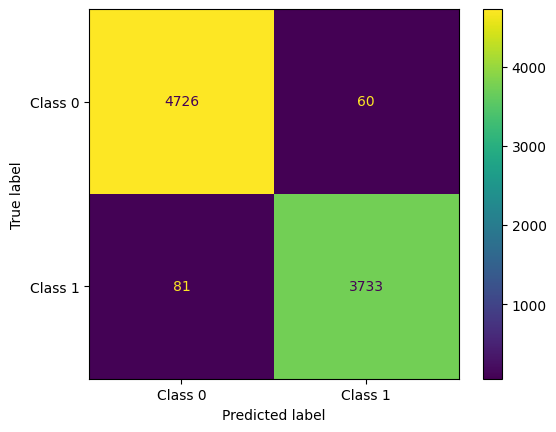

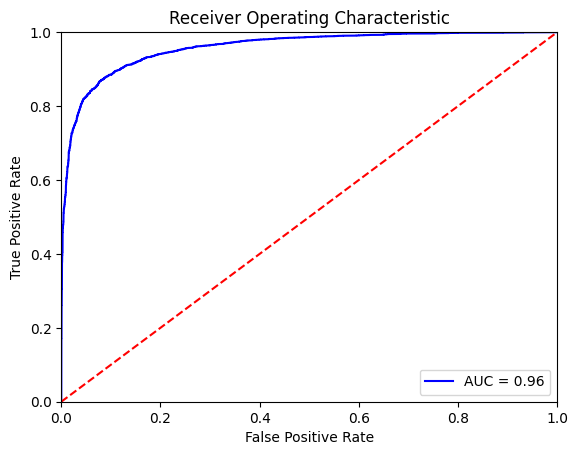

LSTM with Doc2Vec embedding has an Accuracy of: 89.53%
Training Bi-LSTM...
Epoch 1/20

Epoch 1: val_accuracy did not improve from 0.89390
860/860 - 10s - loss: 0.3783 - accuracy: 0.8404 - val_loss: 0.3336 - val_accuracy: 0.8593 - 10s/epoch - 11ms/step
Epoch 2/20

Epoch 2: val_accuracy did not improve from 0.89390
860/860 - 4s - loss: 0.3153 - accuracy: 0.8686 - val_loss: 0.3062 - val_accuracy: 0.8728 - 4s/epoch - 5ms/step
Epoch 3/20

Epoch 3: val_accuracy did not improve from 0.89390
860/860 - 4s - loss: 0.2864 - accuracy: 0.8821 - val_loss: 0.2949 - val_accuracy: 0.8757 - 4s/epoch - 5ms/step
Epoch 4/20

Epoch 4: val_accuracy did not improve from 0.89390
860/860 - 4s - loss: 0.2637 - accuracy: 0.8921 - val_loss: 0.2787 - val_accuracy: 0.8846 - 4s/epoch - 5ms/step
Epoch 5/20

Epoch 5: val_accuracy did not improve from 0.89390
860/860 - 4s - loss: 0.2419 - accuracy: 0.9035 - val_loss: 0.2740 - val_accuracy: 0.8862 - 4s/epoch - 5ms/step
Epoch 6/20

Epoch 6: val_accuracy did not improve fr

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


860/860 - 4s - loss: 0.1939 - accuracy: 0.9238 - val_loss: 0.2690 - val_accuracy: 0.8951 - 4s/epoch - 5ms/step
Epoch 9/20

Epoch 9: val_accuracy did not improve from 0.89506
860/860 - 4s - loss: 0.1804 - accuracy: 0.9300 - val_loss: 0.2742 - val_accuracy: 0.8910 - 4s/epoch - 5ms/step
Epoch 10/20

Epoch 10: val_accuracy did not improve from 0.89506
860/860 - 4s - loss: 0.1678 - accuracy: 0.9357 - val_loss: 0.2754 - val_accuracy: 0.8900 - 4s/epoch - 5ms/step
Epoch 11/20

Epoch 11: val_accuracy did not improve from 0.89506
860/860 - 4s - loss: 0.1529 - accuracy: 0.9429 - val_loss: 0.2877 - val_accuracy: 0.8847 - 4s/epoch - 5ms/step
269/269 [==============================] - 1s 2ms/step
Classification Report for Bi-LSTM with Doc2Vec :
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4786
           1       0.92      0.85      0.88      3814

    accuracy                           0.90      8600
   macro avg       0.90      0.90      0.

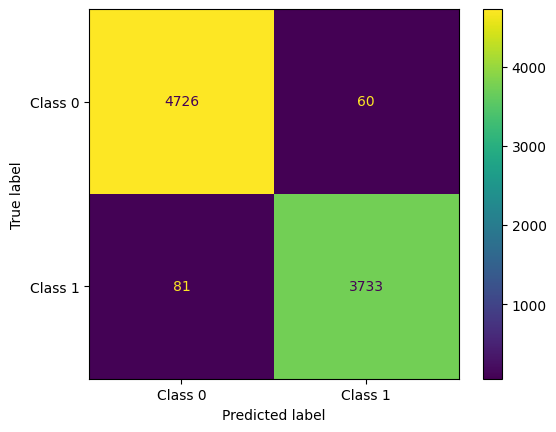

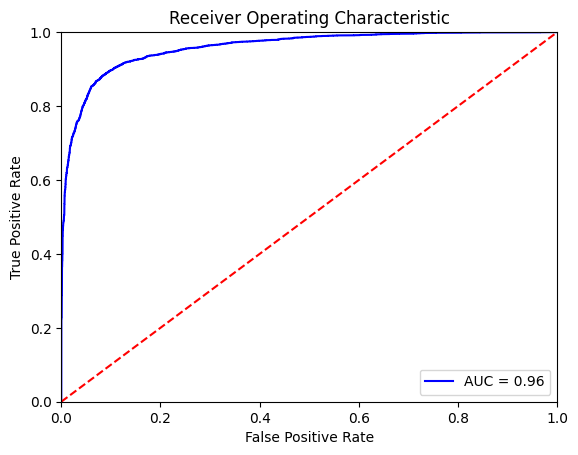

Bi-LSTM with Doc2Vec embedding has an Accuracy of: 90.05%
Total Time by Doc2Vec models: 1.719 minutes


In [ ]:
# To check the vector of a document in the training data
vector = doc2vec_model.dv['0']  # '0' is the tag of the document i.e. first row
print(vector)
# Get document embeddings
doc_embeddings = np.array([doc2vec_model.infer_vector(doc.split()) for doc in data['text']])

# Split the dataset into training and testing sets
X_train_doc, X_test_doc, y_train_doc, y_test_doc = train_test_split(doc_embeddings, data['target'], test_size=0.2, random_state=42)

# Reshape the input data for all bidirectional models
X_train_reshaped = X_train_doc.reshape((X_train_doc.shape[0], 1, X_train_doc.shape[1]))
X_test_reshaped = X_test_doc.reshape((X_test_doc.shape[0], 1, X_test_doc.shape[1]))

start_time = time.time()

models = [
    (LSTM(128), "LSTM"),
    (Bidirectional(LSTM(128, return_sequences=True), input_shape=(1, doc_embeddings.shape[1])), "Bi-LSTM")
    ]

# Train and evaluate each model
for model, model_name in models:
    print(f"Training {model_name}...")

    # Build model
    model_sequence = Sequential()
    model_sequence.add(model)
    model_sequence.add(Dense(1, activation='sigmoid'))

    # Compile model
    model_sequence.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train model
    model_sequence.fit(X_train_reshaped, y_train_doc, epochs=20, batch_size=32, validation_split=0.2, verbose=2, callbacks=[docmodel_checkpoint_callback,doc2vec_early_stop])

    y_pred = model_sequence.predict(X_test_reshaped)

    # Convert probabilities to class labels
    y_pred_labels = (y_pred > 0.5).astype(int)

    # Ensure y_test is a 1D array of binary values
    y_test = np.array(y_test_doc)

    # Ensure y_pred_labels is a 1D array of binary values
    y_pred_labels = y_pred_labels.flatten()

    # Print classification report and confusion matrix
    print(f"Classification Report for {model_name} with Doc2Vec :")
    print(classification_report(y_test_doc, y_pred_labels))

    print(f"Confusion Matrix for {model_name} with Doc2Vec :")
    conf_matrix = confusion_matrix(y_test_doc, y_pred_labels)
    print(conf_matrix)

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot()

    plt.figure()
    make_rocauc(model_sequence,X_test_reshaped,y_test_doc)

    # Calculate accuracy using confusion matrix values
    accuracy_from_conf_matrix = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)
    #print(f"Accuracy calculated from confusion matrix: {accuracy_from_conf_matrix * 100:.2f}%")
    print(f'{model_name} with Doc2Vec embedding has an Accuracy of: {accuracy_from_conf_matrix * 100:.2f}%')

    results.append({'Embedding' : 'Doc2Vec', 'Model': model_name, 'Accuracy': accuracy_from_conf_matrix * 100})

# # Record the end time
end_time = time.time()

model_time = round((time.time()-start_time)/60, 3)
print(f'Total Time by Doc2Vec models: {model_time} minutes')


In [ ]:
Doc2Vec_results_df = pd.read_csv('/content/drive/MyDrive/DeepLearning/Project/results_file.csv')

# Append new results to the DataFrame (replace with your new results)
Doc2Vec_results_df = Doc2Vec_results_df.append(results, ignore_index=True)

# Save the updated DataFrame to the same CSV file
Doc2Vec_results_df.to_csv('/content/drive/MyDrive/DeepLearning/Project/results_file.csv', index=False)

# Display the updated DataFrame
Doc2Vec_results_df

<ipython-input-68-5638d6787c39>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Doc2Vec_results_df = Doc2Vec_results_df.append(results, ignore_index=True)


,Embedding,Model,Accuracy
0,Word2Vec_without_num,LSTM,98.139536
1,Word2Vec_without_num,Bi-LSTM,98.302323
2,FastText_without_num,LSTM,98.418605
3,FastText_without_num,Bi-LSTM,98.651165
4,GloVe_without_num,LSTM,98.406976
5,GloVe_without_num,Bi-LSTM,98.197675
6,Word2Vec_num,LSTM,98.151165
7,Word2Vec_num,Bi-LSTM,98.418605
8,FastText_num,LSTM,98.372096
9,FastText_num,Bi-LSTM,98.232555


# **BERT Embeddings**

In [ ]:
results = []

In [ ]:
start_time = time.time()

# Split the dataset into train, validation, and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    data['text'], data['target'], test_size=0.2, random_state=42)
val_texts, test_texts, val_labels, test_labels = train_test_split(
    test_texts, test_labels, test_size=0.5, random_state=42)
max_length = 128
# Convert Pandas Series to a list of strings
train_texts = train_texts.tolist()
val_texts = val_texts.tolist()
test_texts = test_texts.tolist()
# Initialize the BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
# Tokenize the text data
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=max_length, return_tensors='tf', return_attention_mask=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=max_length, return_tensors='tf', return_attention_mask=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=max_length, return_tensors='tf', return_attention_mask=True)
# Extract the input IDs and attention masks
train_input_ids = train_encodings['input_ids']
train_attention_mask = train_encodings['attention_mask']

val_input_ids = val_encodings['input_ids']
val_attention_mask = val_encodings['attention_mask']

test_input_ids = test_encodings['input_ids']
test_attention_mask = test_encodings['attention_mask']

# Convert labels for BERT input
train_labels = np.array(train_labels).reshape(-1, 1)
val_labels = np.array(val_labels).reshape(-1, 1)
test_labels = np.array(test_labels).reshape(-1, 1)

def convert_labels_for_bert(labels, max_length):
    bert_labels = []
    for label in labels:
        label = label * np.ones(max_length)  # Replicate the label for each token
        bert_labels.append(label)
    return np.array(bert_labels)

train_bert_labels = convert_labels_for_bert(train_labels, max_length)
val_bert_labels = convert_labels_for_bert(val_labels, max_length)
test_bert_labels = convert_labels_for_bert(test_labels, max_length)


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# Build the LSTM model
lstm_input_layer = Input(shape=(max_length,), dtype=tf.int32)
lstm_attention_mask_layer = Input(shape=(max_length,), dtype=tf.int32)  # New input layer for attention masks

# Load BERT model
lstm_bert_model = TFAutoModel.from_pretrained("bert-base-uncased")

# Pass both inputs to the BERT model
lstm_bert_output = lstm_bert_model([lstm_input_layer, lstm_attention_mask_layer])

# Add LSTM layer
lstm_output_layer = LSTM(64, return_sequences=True)(lstm_bert_output['last_hidden_state'])
lstm_output = Dense(1, activation='sigmoid')(lstm_output_layer)

lstm_model = Model(inputs=[lstm_input_layer, lstm_attention_mask_layer], outputs=lstm_output)

lstm_model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy', AUC()])

lstm_model.summary()

# Train the LSTM model
lstm_batch_size = 32
lstm_epochs = 10

lstm_checkpoint_callback = ModelCheckpoint(
    filepath='/content/drive/MyDrive/DeepLearning/Project/lstm_model_checkpoint.h5',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
)
lstm_reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
lstm_early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


try:
    lstm_history = lstm_model.fit(
        x=[train_input_ids, train_attention_mask],
        y=train_bert_labels,
        validation_data=([val_input_ids, val_attention_mask], val_bert_labels),
        batch_size=lstm_batch_size,
        epochs=lstm_epochs,
        callbacks=[lstm_checkpoint_callback,lstm_early_stop]
    )
except Exception as e:
    print("Error during LSTM training:", str(e))

# Load the best LSTM model from the checkpoint file
lstm_model.load_weights('/content/drive/MyDrive/DeepLearning/Project/lstm_model_checkpoint.h5')

# Build the Bi-LSTM model using the BERT outputs
bi_lstm_input_layer = Input(shape=(max_length,), dtype=tf.int32)
bi_lstm_attention_mask_layer = Input(shape=(max_length,), dtype=tf.int32)  # New input layer for attention masks

# Pass both inputs to the BERT model
bi_lstm_bert_output = lstm_bert_model([bi_lstm_input_layer, bi_lstm_attention_mask_layer])

# Add Bi-LSTM layer
bi_lstm_output_layer = Bidirectional(LSTM(64, return_sequences=True))(bi_lstm_bert_output['last_hidden_state'])
bi_lstm_output = Dense(1, activation='sigmoid')(bi_lstm_output_layer)

bi_lstm_model = Model(inputs=[bi_lstm_input_layer, bi_lstm_attention_mask_layer], outputs=bi_lstm_output)

bi_lstm_model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy', AUC()])

bi_lstm_model.summary()

# Train the Bi-LSTM model
bi_lstm_batch_size = 32
bi_lstm_epochs = 10

bi_lstm_checkpoint_callback = ModelCheckpoint(
    filepath='/content/drive/MyDrive/DeepLearning/Project/bi_lstm_model_checkpoint.h5',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
)

bilstm_reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
bilstm_early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

try:
  bi_lstm_history = bi_lstm_model.fit(
        x=[train_input_ids, train_attention_mask],
        y=train_bert_labels,
        validation_data=([val_input_ids, val_attention_mask], val_bert_labels),
        batch_size=bi_lstm_batch_size,
        epochs=bi_lstm_epochs,
        callbacks=[bi_lstm_checkpoint_callback,bilstm_early_stop]
  )
except Exception as e:
  print("Error during Bi-LSTM training:", str(e))

# Load the best Bi-LSTM model from the checkpoint file
bi_lstm_model.load_weights('/content/drive/MyDrive/DeepLearning/Project/bi_lstm_model_checkpoint.h5')



Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_5[0][0]',             
 )                           ngAndCrossAttentions(last_   40         'input_6[0][0]']             
                             hidden_state=(None, 128, 7                                           
                             68),                                                           

1075/1075 [==============================] - 295s 237ms/step - loss: 0.0472 - accuracy: 0.9831 - auc_2: 0.9982 - val_loss: 0.0545 - val_accuracy: 0.9802 - val_auc_2: 0.9975
Epoch 2/10
1075/1075 [==============================] - 240s 223ms/step - loss: 0.0238 - accuracy: 0.9918 - auc_2: 0.9993 - val_loss: 0.0750 - val_accuracy: 0.9783 - val_auc_2: 0.9950
Epoch 3/10
1075/1075 [==============================] - 238s 221ms/step - loss: 0.0131 - accuracy: 0.9957 - auc_2: 0.9995 - val_loss: 0.0668 - val_accuracy: 0.9809 - val_auc_2: 0.9950
Epoch 4/10
1075/1075 [==============================] - 237s 221ms/step - loss: 0.0088 - accuracy: 0.9971 - auc_2: 0.9997 - val_loss: 0.0925 - val_accuracy: 0.9783 - val_auc_2: 0.9926
Epoch 5/10
1075/1075 [==============================] - 237s 221ms/step - loss: 0.0067 - accuracy: 0.9980 - auc_2: 0.9997 - val_loss: 0.0790 - val_accuracy: 0.9779 - val_auc_2: 0.9944
Epoch 6/10
1075/1075 [==============================] - 238s 221ms/step - loss: 0.0065 - ac

In [ ]:
results = []

In [ ]:
# Evaluate the LSTM model on the test set using BERT-compatible labels
lstm_test_loss, lstm_test_acc, lstm_test_auc = lstm_model.evaluate([test_input_ids, test_attention_mask], test_bert_labels)
print(f'LSTM Test loss: {lstm_test_loss}, Test AUC: {lstm_test_auc}, Test Accuracy: {lstm_test_acc}')

results.append({'Embedding' : 'Bert', 'Model': 'LSTM', 'Accuracy': lstm_test_acc * 100})

# Evaluate the Bi-LSTM model on the test set using BERT-compatible labels
bi_lstm_test_loss, bi_lstm_test_acc, bi_lstm_test_auc = bi_lstm_model.evaluate([test_input_ids, test_attention_mask], test_bert_labels)
print(f'Bi-LSTM Test loss: {bi_lstm_test_loss}, Test AUC: {bi_lstm_test_auc}, Test Accuracy: {bi_lstm_test_acc}')

results.append({'Embedding' : 'Bert', 'Model': 'Bi-LSTM', 'Accuracy': bi_lstm_test_acc * 100})


135/135 [==============================] - 11s 78ms/step - loss: 0.1717 - accuracy: 0.9771 - auc: 0.9884
LSTM Test loss: 0.17165789008140564, Test AUC: 0.988446831703186, Test Accuracy: 0.9771220684051514
135/135 [==============================] - 11s 80ms/step - loss: 0.0654 - accuracy: 0.9765 - auc_2: 0.9959
Bi-LSTM Test loss: 0.06537852436304092, Test AUC: 0.9959390163421631, Test Accuracy: 0.9765334129333496


135/135 [==============================] - 14s 78ms/step
Classification Report for LSTM:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98    306176
         1.0       0.97      0.98      0.97    244224

    accuracy                           0.98    550400
   macro avg       0.98      0.98      0.98    550400
weighted avg       0.98      0.98      0.98    550400

Confusion Matrix for LSTM:
[[299018   7158]
 [  5434 238790]]
135/135 [==============================] - 14s 79ms/step
Classification Report for Bi-LSTM:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98    306176
         1.0       0.97      0.98      0.97    244224

    accuracy                           0.98    550400
   macro avg       0.98      0.98      0.98    550400
weighted avg       0.98      0.98      0.98    550400

Confusion Matrix for Bi-LSTM:
[[298963   7213]
 [  5703 238521]]
Total Time by BERT model: 107.752 minu

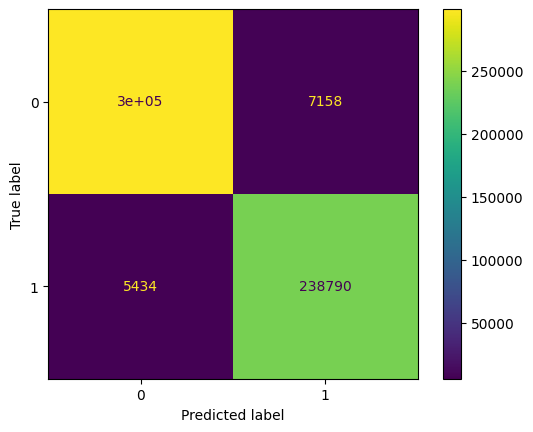

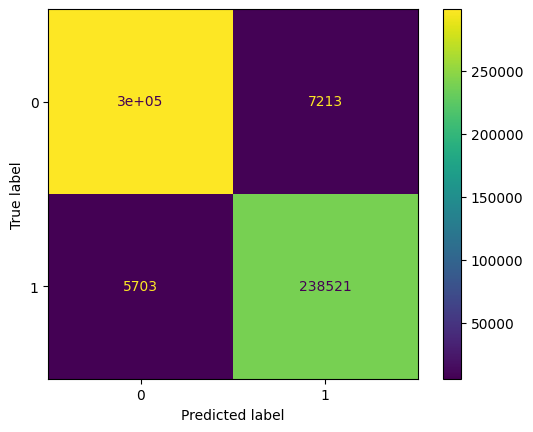

In [ ]:
# Evaluate and generate metrics for LSTM model
lstm_test_loss, lstm_test_acc, lstm_test_auc = lstm_model.evaluate([test_input_ids, test_attention_mask], test_bert_labels)
lstm_y_pred = lstm_model.predict([test_input_ids, test_attention_mask])
lstm_y_pred_labels = (lstm_y_pred > 0.5).astype(int)

print("Classification Report for LSTM:")
print(classification_report(test_bert_labels.flatten(), lstm_y_pred_labels.flatten()))

print("Confusion Matrix for LSTM:")
lstm_cm = confusion_matrix(test_bert_labels.flatten(), lstm_y_pred_labels.flatten())
print(lstm_cm)

lstm_disp = ConfusionMatrixDisplay(confusion_matrix=lstm_cm, display_labels=[0, 1])
lstm_disp.plot()

#make_rocauc(lstm_model, [test_input_ids, test_attention_mask], test_bert_labels)

# Evaluate and generate metrics for Bi-LSTM model
bi_lstm_test_loss, bi_lstm_test_acc, bi_lstm_test_auc = bi_lstm_model.evaluate([test_input_ids, test_attention_mask], test_bert_labels)
bi_lstm_y_pred = bi_lstm_model.predict([test_input_ids, test_attention_mask])
bi_lstm_y_pred_labels = (bi_lstm_y_pred > 0.5).astype(int)

print("Classification Report for Bi-LSTM:")
print(classification_report(test_bert_labels.flatten(), bi_lstm_y_pred_labels.flatten()))

print("Confusion Matrix for Bi-LSTM:")
bi_lstm_cm = confusion_matrix(test_bert_labels.flatten(), bi_lstm_y_pred_labels.flatten())
print(bi_lstm_cm)

bi_lstm_disp = ConfusionMatrixDisplay(confusion_matrix=bi_lstm_cm, display_labels=[0, 1])
bi_lstm_disp.plot()

#make_rocauc(bi_lstm_model, [test_input_ids, test_attention_mask], test_bert_labels)

# # Record the end time
end_time = time.time()

model_time = round((time.time()-start_time)/60, 3)
print(f'Total Time by BERT model: {model_time} minutes')


# **Results**

In [ ]:
bert_results_df = pd.read_csv('/content/drive/MyDrive/DeepLearning/Project/results_file.csv')

# Append new results to the DataFrame (replace with your new results)
#new_results = [{'Embedding': 'NewEmbedding', 'Model': 'NewModel', 'Accuracy': 90.5}]
bert_results_df = bert_results_df.append(results, ignore_index=True)

# Save the updated DataFrame to the same CSV file
bert_results_df.to_csv('/content/drive/MyDrive/DeepLearning/Project/results_file.csv', index=False)

# Display the updated DataFrame
bert_results_df

<ipython-input-30-dd6dc26522c2>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bert_results_df = bert_results_df.append(results, ignore_index=True)


,Embedding,Model,Accuracy
0,Word2Vec_without_num,LSTM,98.139536
1,Word2Vec_without_num,Bi-LSTM,98.302323
2,FastText_without_num,LSTM,98.418605
3,FastText_without_num,Bi-LSTM,98.651165
4,GloVe_without_num,LSTM,98.406976
5,GloVe_without_num,Bi-LSTM,98.197675
6,Word2Vec_num,LSTM,98.151165
7,Word2Vec_num,Bi-LSTM,98.418605
8,FastText_num,LSTM,98.372096
9,FastText_num,Bi-LSTM,98.232555


# **Results on Ascending order**

In [ ]:
df_results = pd.read_csv('/content/drive/MyDrive/DeepLearning/Project/results_file(1).csv')

df_results.sort_values(by='Accuracy', ascending=False)


,Embedding,Model,Accuracy
3,FastText_without_num,Bi-LSTM,98.651165
10,GloVe_num,LSTM,98.546511
2,FastText_without_num,LSTM,98.418605
7,Word2Vec_num,Bi-LSTM,98.418605
4,GloVe_without_num,LSTM,98.406976
8,FastText_num,LSTM,98.372096
11,GloVe_num,Bi-LSTM,98.360467
1,Word2Vec_without_num,Bi-LSTM,98.302323
9,FastText_num,Bi-LSTM,98.232555
5,GloVe_without_num,Bi-LSTM,98.197675


# **Bi-LSTM Results**

In [ ]:
df_res = df_results[df_results['Model'] == 'Bi-LSTM']
df_res.sort_values(by='Accuracy', ascending=False)


,Embedding,Model,Accuracy
3,FastText_without_num,Bi-LSTM,98.651165
7,Word2Vec_num,Bi-LSTM,98.418605
11,GloVe_num,Bi-LSTM,98.360467
1,Word2Vec_without_num,Bi-LSTM,98.302323
9,FastText_num,Bi-LSTM,98.232555
5,GloVe_without_num,Bi-LSTM,98.197675
15,Bert,Bi-LSTM,97.653341
13,Doc2Vec,Bi-LSTM,90.046512


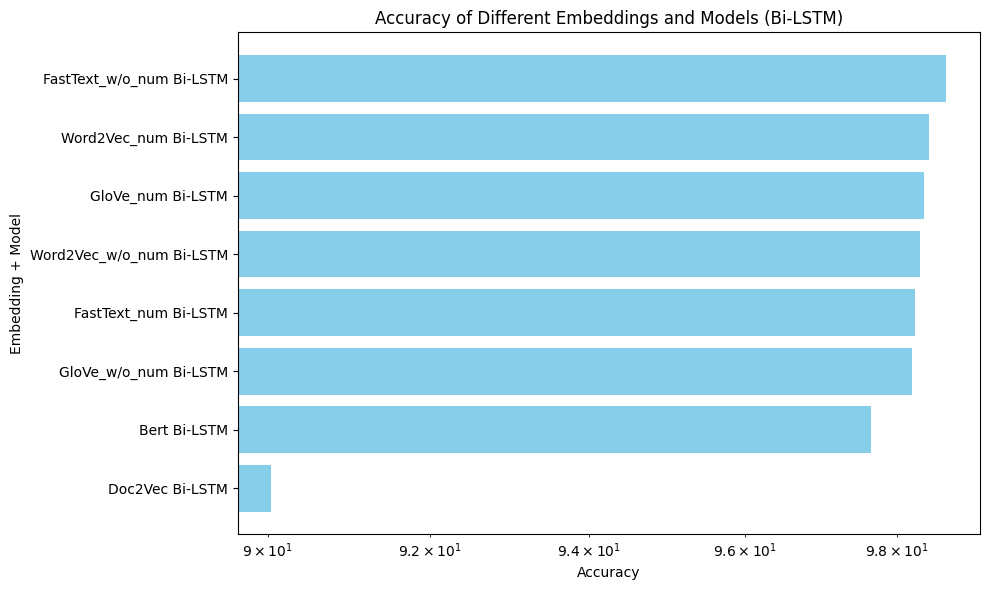

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Assuming df is your DataFrame
data = {
    'Embedding + Model': [
        'FastText_w/o_num Bi-LSTM',
        'Word2Vec_num Bi-LSTM',
        'GloVe_num Bi-LSTM',
        'Word2Vec_w/o_num Bi-LSTM',
        'FastText_num Bi-LSTM',
        'GloVe_w/o_num Bi-LSTM',
        'Bert Bi-LSTM',
        'Doc2Vec Bi-LSTM'
    ],
    'Accuracy': [98.651165, 98.418605, 98.360467, 98.302323, 98.232555, 98.197675, 97.653341, 90.046512]
}

df = pd.DataFrame(data)

# Sort the DataFrame by accuracy in descending order
df = df.sort_values(by='Accuracy', ascending=True)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(df['Embedding + Model'], df['Accuracy'], color='skyblue', log=True)
plt.ylabel('Embedding + Model')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Embeddings and Models (Bi-LSTM)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

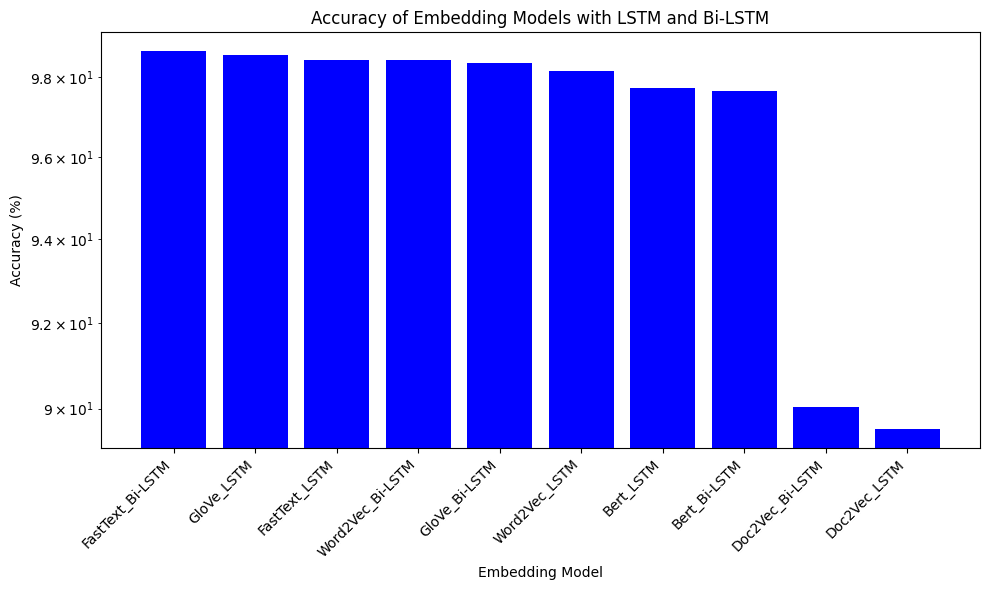

In [ ]:
# Sample data
data = {
    'Embedding_Model': [
        'FastText_Bi-LSTM',
        'Word2Vec_Bi-LSTM',
        'GloVe_LSTM',
        'FastText_LSTM',
        'GloVe_Bi-LSTM',
        'Word2Vec_Bi-LSTM',
        'FastText_Bi-LSTM',
        'GloVe_Bi-LSTM',
        'Word2Vec_LSTM',
        'Word2Vec_LSTM',
        'Bert_LSTM',
        'Bert_Bi-LSTM',
        'Doc2Vec_Bi-LSTM',
        'Doc2Vec_LSTM',
    ],
    'Accuracy': [
        98.651165,
        98.546511,
        98.418605,
        98.418605,
        98.406976,
        98.372096,
        98.360467,
        98.302323,
        98.232555,
        98.197675,
        98.151165,
        98.139536,
        97.712207,
        97.653341,
        90.046512,
        89.534884,
    ]
}

df = pd.DataFrame(data)

# Sort the DataFrame by Accuracy in descending order
df = df.sort_values(by='Accuracy', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['Embedding_Model'], df['Accuracy'], color='blue', log=True)
plt.xlabel('Embedding Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Embedding Models with LSTM and Bi-LSTM')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()